In [27]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data = pd.read_csv('data/creditcard.csv')

## Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


## Pre-processing

In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,0,-0.190454
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,0,0.017516
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,0,-0.231161
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,0,0.016340
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,0,-0.190258


In [6]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,-0.058119,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,0,-0.190454
1,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,-0.093670,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,0,0.017516
2,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,0.182768,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,0,-0.231161
3,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,0.849479,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,0,0.016340
4,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,0.744263,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,0,-0.190258


In [7]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [8]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [10]:
X_train.shape

(130200, 29)

In [11]:
X_test.shape

(55800, 29)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Training

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
130200/130200 [==============================] - 16s 125us/step - loss: 0.0120 - acc: 0.9971
Epoch 2/5
130200/130200 [==============================] - 17s 132us/step - loss: 0.0042 - acc: 0.9994
Epoch 3/5
130200/130200 [==============================] - 17s 133us/step - loss: 0.0036 - acc: 0.9995
Epoch 4/5
130200/130200 [==============================] - 15s 119us/step - loss: 0.0034 - acc: 0.9995
Epoch 5/5
130200/130200 [==============================] - 15s 118us/step - loss: 0.0034 - acc: 0.9995


In [17]:
score = model.evaluate(X_test, y_test)

55800/55800 [==============================] - 1s 24us/step


In [18]:
print(score)

[0.005581740384915497, 0.9992831541218637]


In [19]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [24]:
print(cnf_matrix)

[[55690    19]
 [   21    70]]


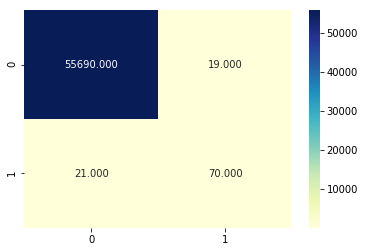

In [25]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

In [28]:
plt.show()